In [9]:
#美金對台幣匯率
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
url="https://rate.bot.com.tw/xrt?Lang=zh-TW"
res=requests.get(url)
soup=BeautifulSoup(res.text,"html5lib")
A=soup.find(name="tbody").find_all(name="tr")
cur=A[0].find("div",{"class":"visible-phone print_hide"})
print(cur.string.replace(" ","soup.fin"))
buyrate=A[0].find("td",{"data-table":"本行現金買入"})
sellrate=A[0].find("td",{"data-table":"本行現金賣出"})
print("即時現金買入: %s, 即時現今賣出: %s" % (buyrate.get_text(),sellrate.get_text()))


美金(USD)

即時現金買入: 29.17, 即時現今賣出: 29.84


In [10]:
#所有貨幣對台幣的匯率
for d in A:
    money=d.find("div",{"class":"visible-phone print_hide"}).text.strip()
    buy=d.find("td",{"data-table":"本行現金買入"}).text.strip()
    sell=d.find("td",{"data-table":"本行現金賣出"}).text.strip()
    print(money,"即時現金買入:",buy,"即時現金賣出:",sell)
    print("-------------------------------")


美金 (USD) 即時現金買入: 29.17 即時現金賣出: 29.84
-------------------------------
港幣 (HKD) 即時現金買入: 3.659 即時現金賣出: 3.863
-------------------------------
英鎊 (GBP) 即時現金買入: 35.64 即時現金賣出: 37.76
-------------------------------
澳幣 (AUD) 即時現金買入: 20.13 即時現金賣出: 20.91
-------------------------------
加拿大幣 (CAD) 即時現金買入: 21.31 即時現金賣出: 22.22
-------------------------------
新加坡幣 (SGD) 即時現金買入: 20.63 即時現金賣出: 21.54
-------------------------------
瑞士法郎 (CHF) 即時現金買入: 30.42 即時現金賣出: 31.62
-------------------------------
日圓 (JPY) 即時現金買入: 0.2659 即時現金賣出: 0.2787
-------------------------------
南非幣 (ZAR) 即時現金買入: - 即時現金賣出: -
-------------------------------
瑞典幣 (SEK) 即時現金買入: 2.79 即時現金賣出: 3.31
-------------------------------
紐元 (NZD) 即時現金買入: 18.82 即時現金賣出: 19.67
-------------------------------
泰幣 (THB) 即時現金買入: 0.8238 即時現金賣出: 1.0138
-------------------------------
菲國比索 (PHP) 即時現金買入: 0.524 即時現金賣出: 0.657
-------------------------------
印尼幣 (IDR) 即時現金買入: 0.00168 即時現金賣出: 0.00238
-------------------------------
歐元 (EUR) 即時現金買入: 32.4 即時現

C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

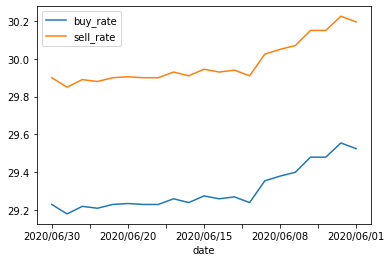

In [34]:
#爬取一個月的美金對台幣歷史匯率資料
link=A[0].find("td",{"data-table":"歷史匯率"})
link1="https://rate.bot.com.tw"+link.a["href"]
link2=link1.replace("history","quote/2020-06")
res1=requests.get(link2, verify=False)
res1.encoding="utf-8"
soup1=BeautifulSoup(res1.text,"html5lib")
B=soup1.find(name='tbody').find_all(name="tr")

#彙整趨勢圖資料
datehis=list()
buyhis=list()
sellhis=list()
for r in B:
    date_string=r.a.get_text()
    data=datetime.strptime(date_string,"%Y/%M/%d").strftime("%Y/%M/%d")
    datehis.append(data)
    
    exrate=r.find_all("td",{"class":"rate-content-cash text-right print_table-cell"})
    buyhis.append(float(exrate[0].get_text()))
    sellhis.append(float(exrate[1].get_text()))
                
#將資料彙整成dataframe模式
A=pd.DataFrame({"date":datehis,"buy_rate":buyhis,"sell_rate":sellhis})
A=A.set_index("date")

#畫出軌跡圖
plt.figure(figsize=(10,8))
A[["buy_rate","sell_rate"]].plot()
plt.legend(loc="upper left")
plt.show()



美金(USD)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

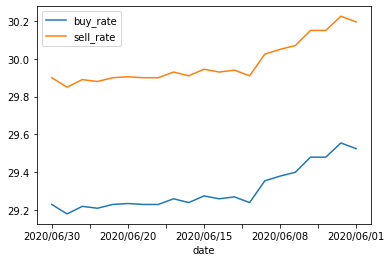


港幣(HKD)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

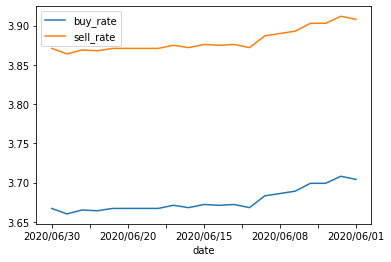


英鎊(GBP)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

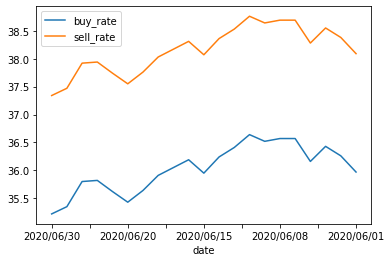


澳幣(AUD)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

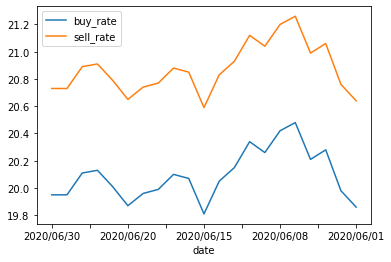


加拿大幣(CAD)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

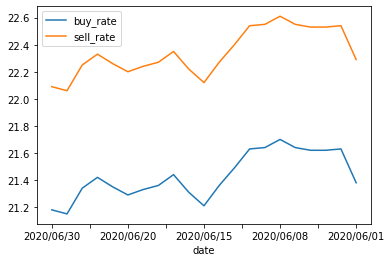


新加坡幣(SGD)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

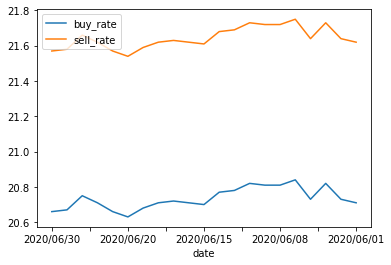


瑞士法郎(CHF)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

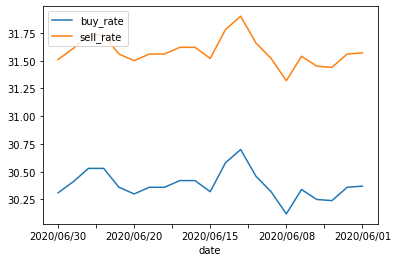


日圓(JPY)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

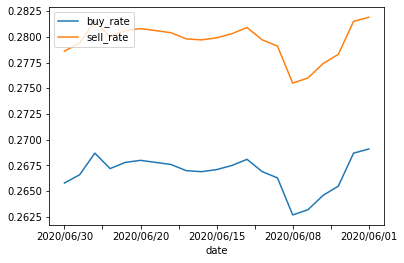


南非幣(ZAR)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

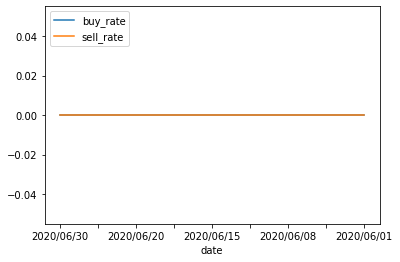


瑞典幣(SEK)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

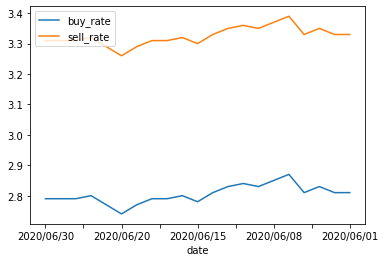


紐元(NZD)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

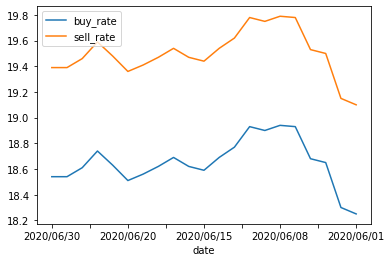


泰幣(THB)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

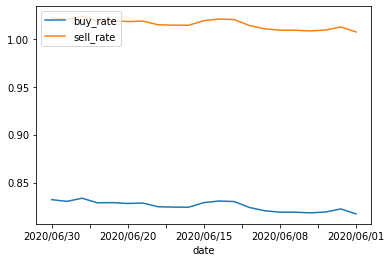


菲國比索(PHP)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

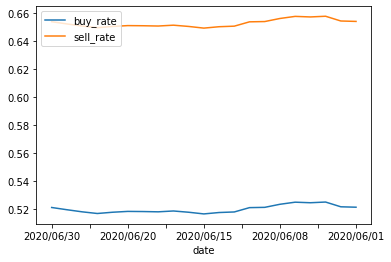


印尼幣(IDR)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

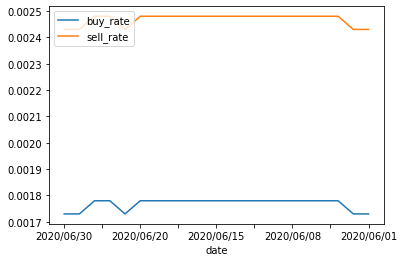


歐元(EUR)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

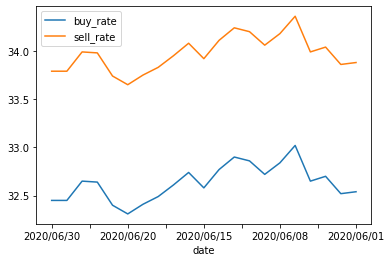


韓元(KRW)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

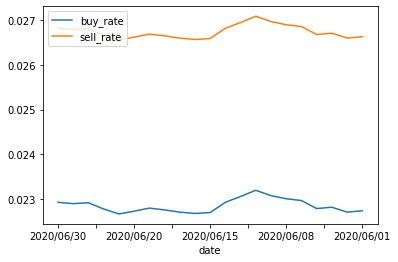


越南盾(VND)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

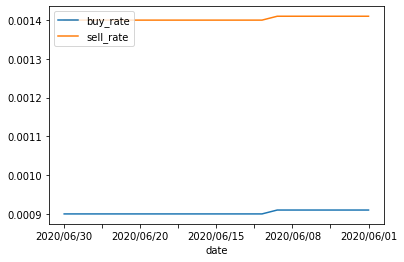


馬來幣(MYR)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

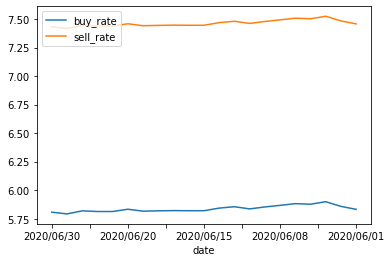


人民幣(CNY)



C:\Users\youpin\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 720x576 with 0 Axes>

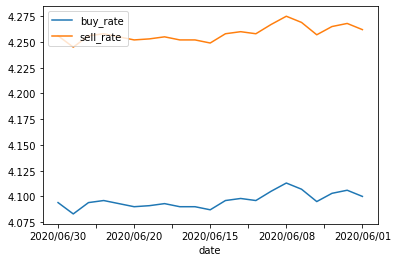

In [38]:
#爬取每一種貨幣對台灣一個月歷史匯率趨勢圖
for r in A:
    #印出每種貨幣名
    cur=r.find("div",{"class":"visible-phone print_hide"})
    print(cur.get_text().replace(" ",""))
    
    #抓取貨幣的歷史網頁
    link=r.find("td",{"data-table":"歷史匯率"})
    link1="https://rate.bot.com.tw"+link.a["href"]
    link2=link1.replace("history","quote/2020-06")
    res1=requests.get(link2, verify=False)
    res1.encoding="utf-8"
    soup1=BeautifulSoup(res1.text,"html5lib")
    B=soup1.find(name='tbody').find_all(name="tr")

    #彙整趨勢圖資料
    datehis=list()
    buyhis=list()
    sellhis=list()
    for r in B:
        date_string=r.a.get_text()
        data=datetime.strptime(date_string,"%Y/%M/%d").strftime("%Y/%M/%d")
        datehis.append(data)

        exrate=r.find_all("td",{"class":"rate-content-cash text-right print_table-cell"})
        buyhis.append(float(exrate[0].get_text()))
        sellhis.append(float(exrate[1].get_text()))
                
    #將資料彙整成dataframe模式
    A=pd.DataFrame({"date":datehis,"buy_rate":buyhis,"sell_rate":sellhis})
    A=A.set_index("date")

    #畫出軌跡圖
    plt.figure(figsize=(10,8))
    A[["buy_rate","sell_rate"]].plot()
    plt.legend(loc="upper left")
    plt.show()